In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

# LOCM2 acceptance rate

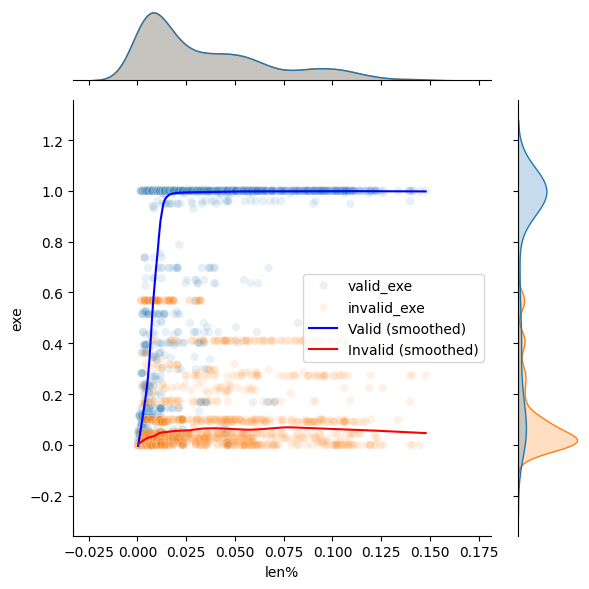

In [19]:


# Read and clean
df = pd.read_csv('acceptance_rate.csv')
df.columns = df.columns.str.strip()
df = df.sort_values(by='len%')

# Apply LOWESS
valid_smoothed = lowess(df['valid_exe'], df['len%'], frac=0.3)
invalid_smoothed = lowess(df['invalid_exe'], df['len%'], frac=0.3)

# Combine into dataframe for seaborn
df_long = pd.melt(df, id_vars=['len%'], value_vars=['valid_exe', 'invalid_exe'],
                  var_name='type', value_name='exe')

# Plot using seaborn
g = sns.jointplot(
    data=df_long, x='len%', y='exe', hue='type',
    kind='scatter', alpha=0.1, height=6, marginal_kws=dict(common_norm=False)
)

# Overlay LOWESS lines
plt.plot(valid_smoothed[:, 0], valid_smoothed[:, 1], label='Valid (smoothed)', color='blue')
plt.plot(invalid_smoothed[:, 0], invalid_smoothed[:, 1], label='Invalid (smoothed)', color='red')
plt.legend()
plt.tight_layout()
plt.show()


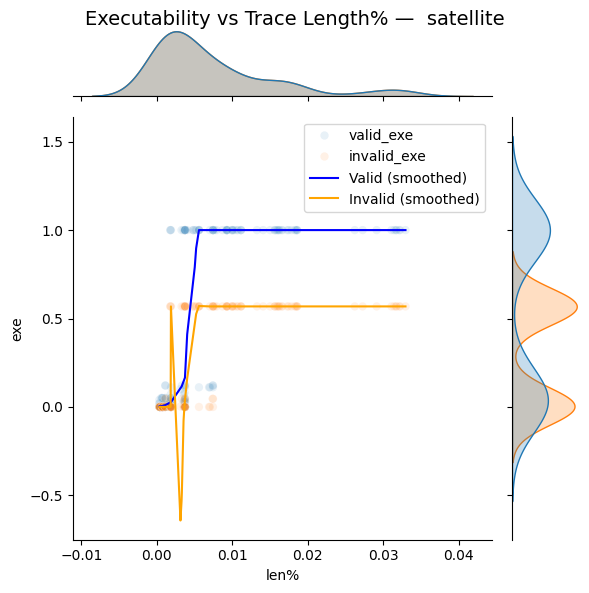

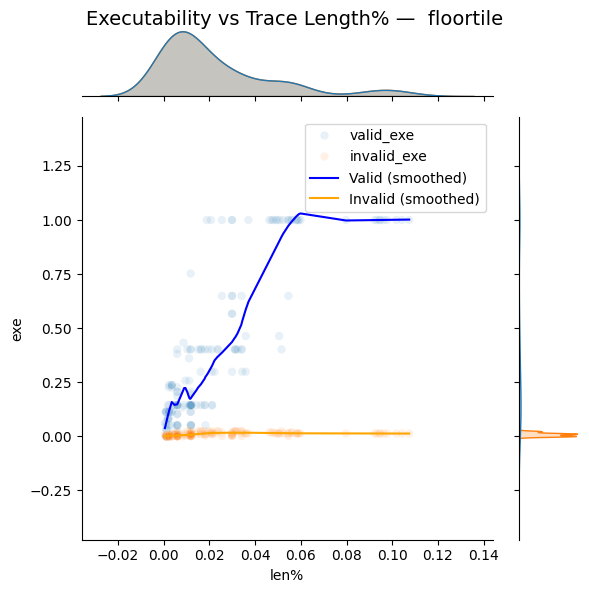

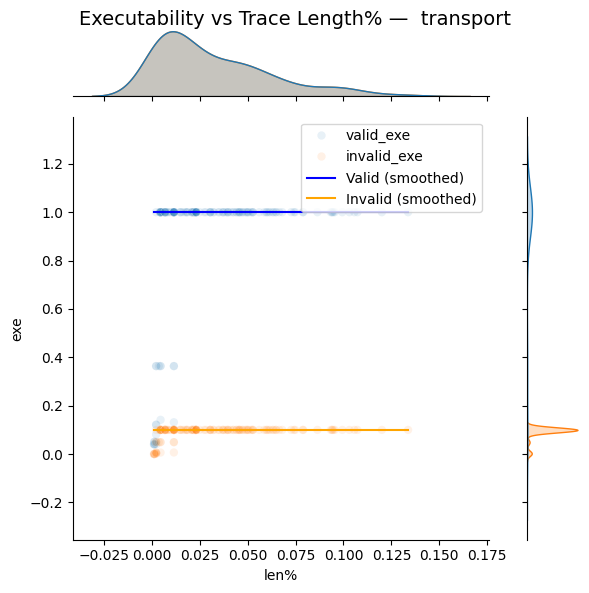

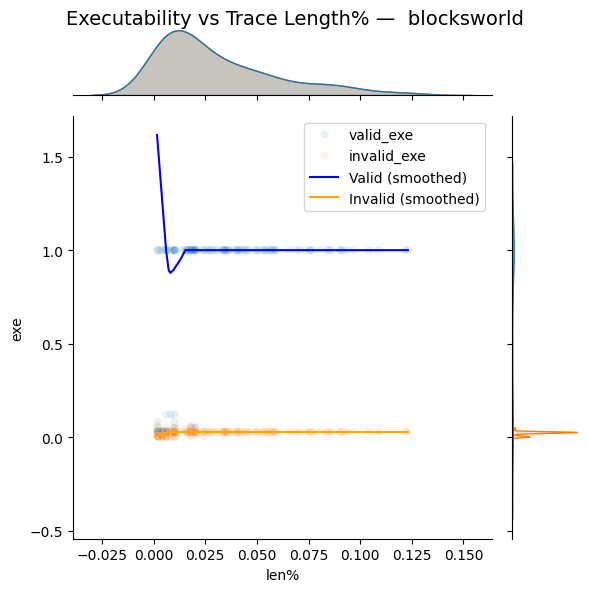

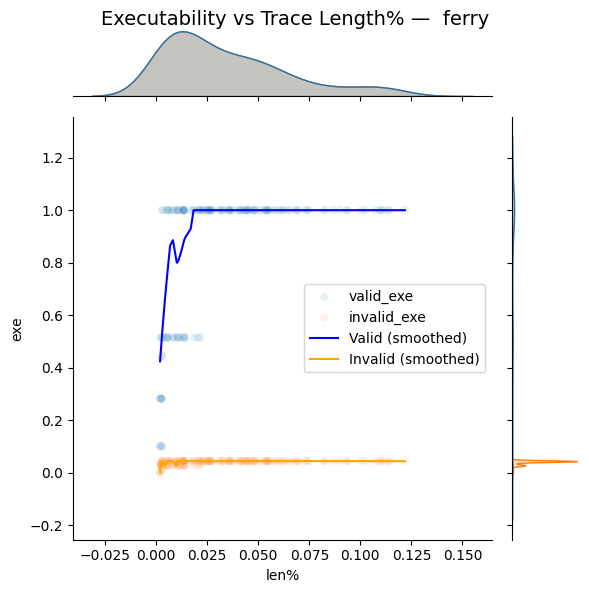

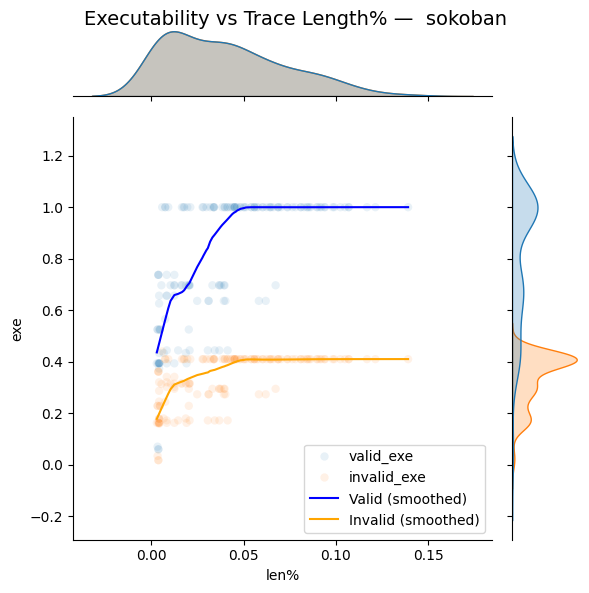

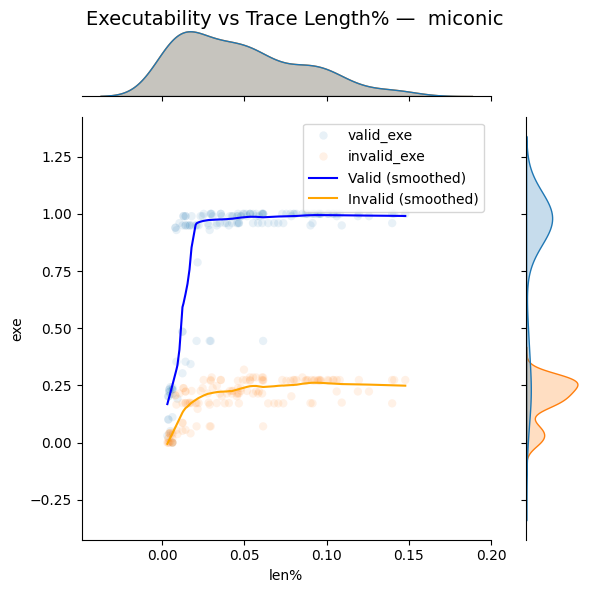

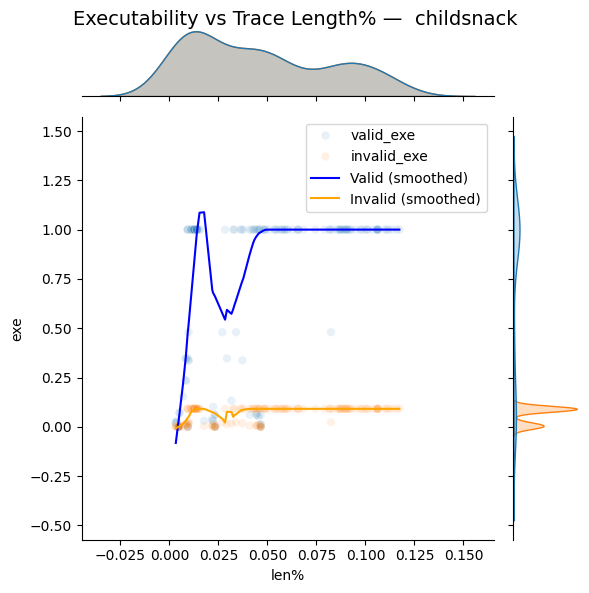

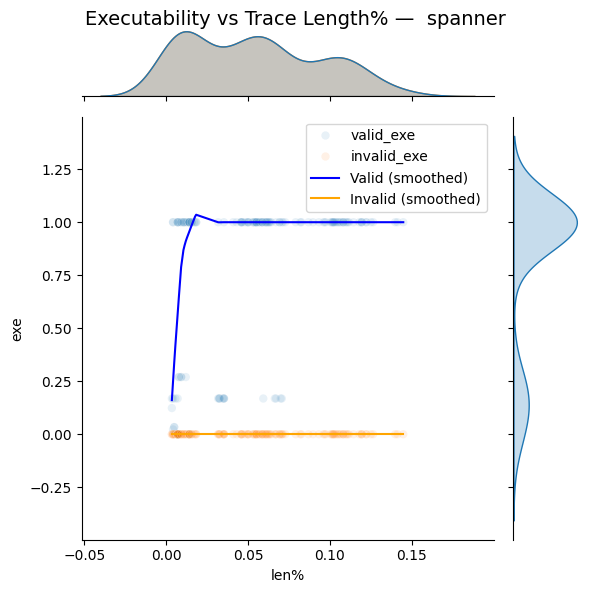

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

# Read and clean
df = pd.read_csv('acceptance_rate.csv')
df.columns = df.columns.str.strip()
df = df.sort_values(by='len%')

# Get unique domains
domains = df['Domain'].unique()

for domain in domains:
    domain_df = df[df['Domain'] == domain].copy()

    # Apply LOWESS smoothing
    valid_smoothed = lowess(domain_df['valid_exe'], domain_df['len%'], frac=0.3)
    invalid_smoothed = lowess(domain_df['invalid_exe'], domain_df['len%'], frac=0.3)

    valid_smoothed[:, 1] = valid_smoothed[:, 1].clip(0, 1)
    invalid_smoothed[:, 1] = invalid_smoothed[:, 1].clip(0, 1)

    # Melt to long format for seaborn
    df_long = pd.melt(
        domain_df,
        id_vars=['len%'],
        value_vars=['valid_exe', 'invalid_exe'],
        var_name='type',
        value_name='exe'
    )

    # Create jointplot
    g = sns.jointplot(
        data=df_long,
        x='len%', y='exe', hue='type',
        kind='scatter', alpha=0.1,
        height=6, marginal_kws=dict(common_norm=False)
    )

    # Overlay LOWESS lines
    g.ax_joint.plot(valid_smoothed[:, 0], valid_smoothed[:, 1], color='blue', label='Valid (smoothed)')
    g.ax_joint.plot(invalid_smoothed[:, 0], invalid_smoothed[:, 1], color='orange', label='Invalid (smoothed)')
    g.ax_joint.legend()

    # Add title
    g.fig.suptitle(f"Executability vs Trace Length% — {domain}", fontsize=14)
    g.fig.tight_layout()
    g.fig.subplots_adjust(top=0.95)

    # Show the plot
    plt.show()


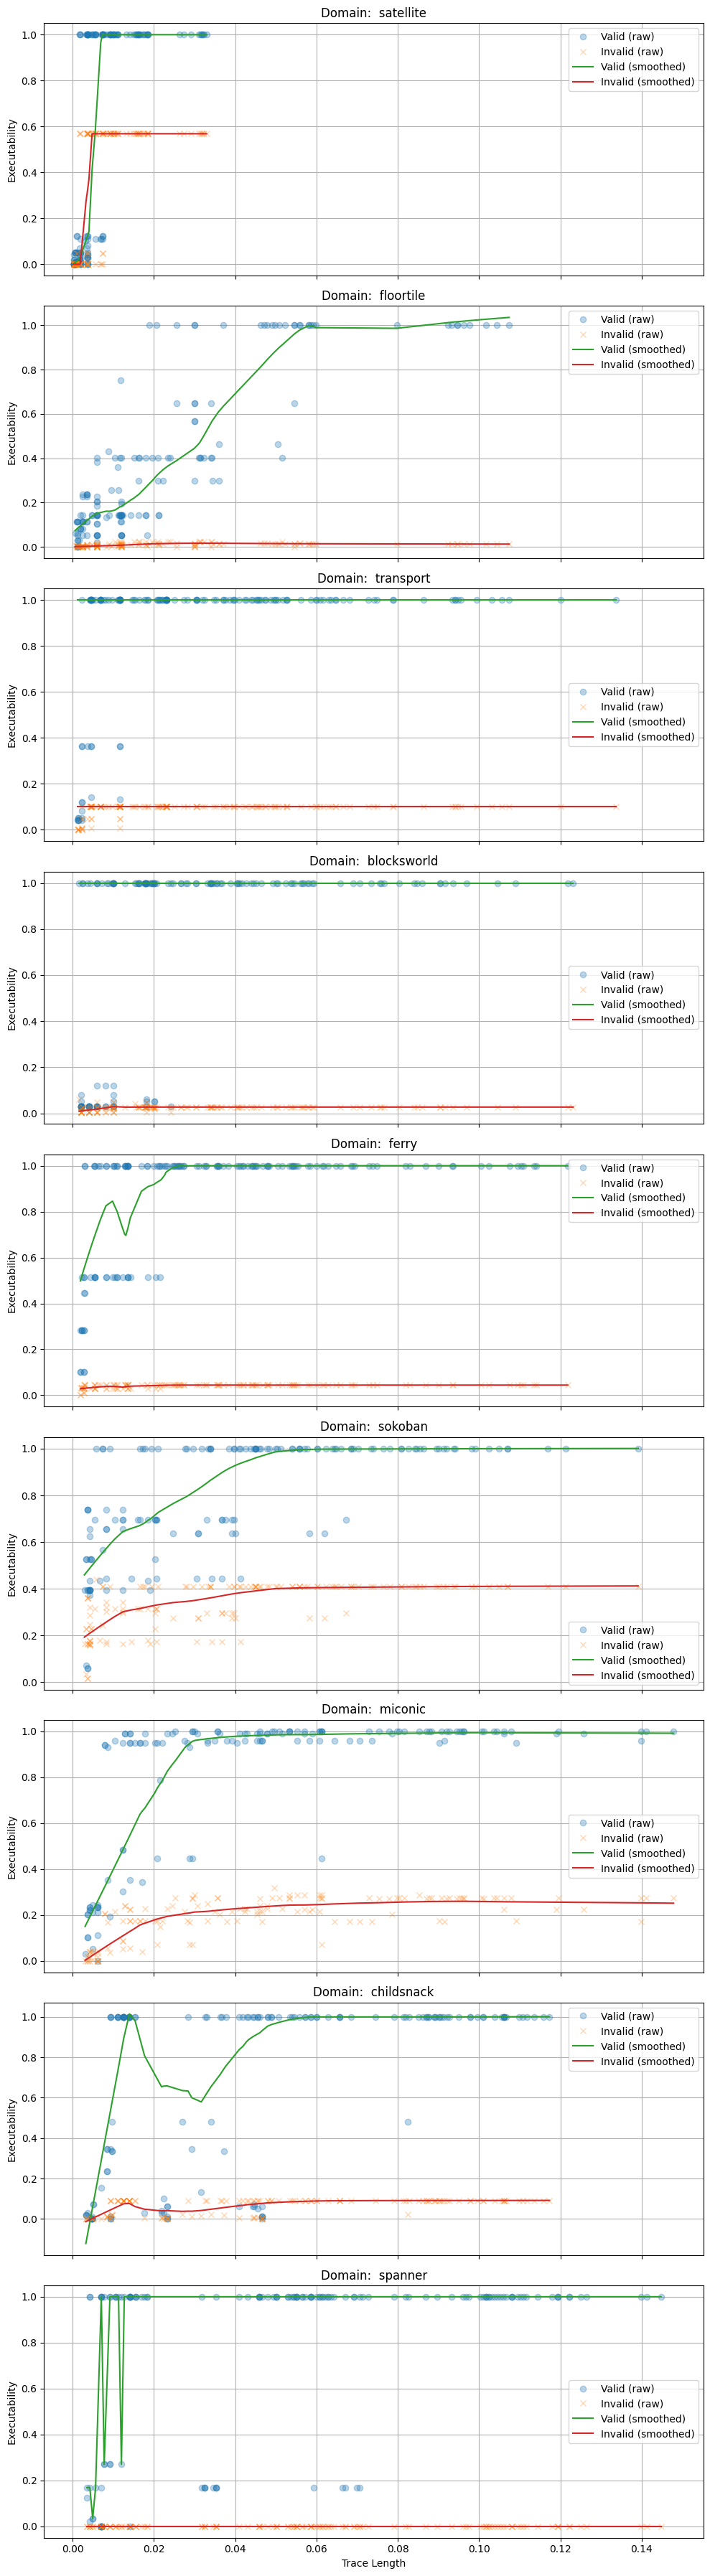

In [4]:


# Get unique domains
domains = df['Domain'].unique()
n_domains = len(domains)

# Create subplots
fig, axes = plt.subplots(n_domains, 1, figsize=(10, 4 * n_domains), sharex=True)

# If only one domain, make axes iterable
if n_domains == 1:
    axes = [axes]

# Plot smoothed curves per domain
for ax, domain in zip(axes, domains):
    domain_df = df[df['Domain'] == domain].sort_values(by='len%')

    # Skip if not enough data points
    if len(domain_df) < 3:
        ax.set_title(f"{domain} (too few points)")
        continue

    # Smooth
    valid_smooth = lowess(domain_df['valid_exe'], domain_df['len%'], frac=0.4)
    invalid_smooth = lowess(domain_df['invalid_exe'], domain_df['len%'], frac=0.4)

    # Plot raw and smoothed
    ax.plot(domain_df['len%'], domain_df['valid_exe'], 'o', alpha=0.3, label='Valid (raw)')
    ax.plot(domain_df['len%'], domain_df['invalid_exe'], 'x', alpha=0.3, label='Invalid (raw)')
    ax.plot(valid_smooth[:, 0], valid_smooth[:, 1], label='Valid (smoothed)')
    ax.plot(invalid_smooth[:, 0], invalid_smooth[:, 1], label='Invalid (smoothed)')

    ax.set_title(f"Domain: {domain}")
    ax.set_ylabel("Executability")
    ax.grid(True)
    ax.legend()

axes[-1].set_xlabel("Trace Length")
plt.tight_layout()
plt.show()


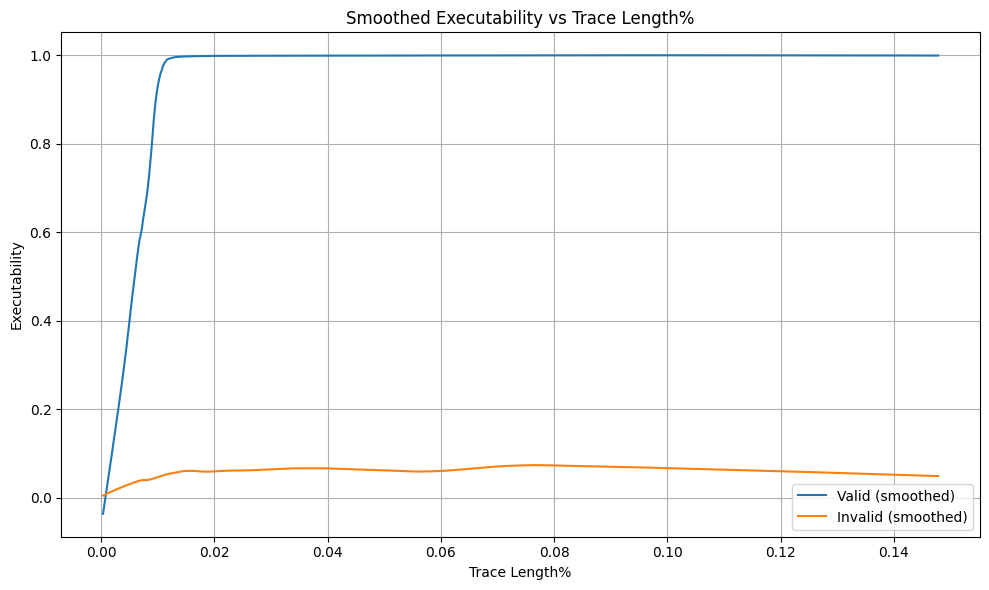

In [5]:



# Read and clean
df = pd.read_csv('locm_acceptance_rate.csv')
df.columns = df.columns.str.strip()
df = df.sort_values(by='len%')

# Apply LOWESS
valid_smoothed = lowess(df['valid_exe'], df['len%'], frac=0.3)
invalid_smoothed = lowess(df['invalid_exe'], df['len%'], frac=0.3)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(valid_smoothed[:, 0], valid_smoothed[:, 1], label='Valid (smoothed)')
plt.plot(invalid_smoothed[:, 0], invalid_smoothed[:, 1], label='Invalid (smoothed)')
plt.xlabel("Trace Length%")
plt.ylabel("Executability")
plt.title("Smoothed Executability vs Trace Length%")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Balanced exe

In [8]:


# # Read and clean
# df = pd.read_csv('balanced_exe.csv')
# df.columns = df.columns.str.strip()
# df = df.sort_values(by='len%')

# # Apply LOWESS
# valid_smoothed = lowess(df['valid_exe'], df['len%'], frac=0.3)
# invalid_smoothed = lowess(df['invalid_exe'], df['len%'], frac=0.3)

# # Plot
# plt.figure(figsize=(10, 6))
# plt.plot(valid_smoothed[:, 0], valid_smoothed[:, 1], label='Valid (smoothed)')
# plt.plot(invalid_smoothed[:, 0], invalid_smoothed[:, 1], label='Invalid (smoothed)')
# plt.xlabel("Trace Length%")
# plt.ylabel("Executability")
# plt.title("Smoothed Executability vs Trace Length%")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [9]:


# # Get unique domains
# domains = df['Domain'].unique()
# n_domains = len(domains)

# # Create subplots
# fig, axes = plt.subplots(n_domains, 1, figsize=(10, 4 * n_domains), sharex=True)

# # If only one domain, make axes iterable
# if n_domains == 1:
#     axes = [axes]

# # Plot smoothed curves per domain
# for ax, domain in zip(axes, domains):
#     domain_df = df[df['Domain'] == domain].sort_values(by='len%')

#     # Skip if not enough data points
#     if len(domain_df) < 3:
#         ax.set_title(f"{domain} (too few points)")
#         continue

#     # Smooth
#     valid_smooth = lowess(domain_df['valid_exe'], domain_df['len'], frac=0.4)
#     invalid_smooth = lowess(domain_df['invalid_exe'], domain_df['len'], frac=0.4)

#     # Plot raw and smoothed
#     ax.plot(domain_df['len%'], domain_df['valid_exe'], 'o', alpha=0.3, label='Valid (raw)')
#     ax.plot(domain_df['len%'], domain_df['invalid_exe'], 'x', alpha=0.3, label='Invalid (raw)')
#     ax.plot(valid_smooth[:, 0], valid_smooth[:, 1], label='Valid (smoothed)')
#     ax.plot(invalid_smooth[:, 0], invalid_smooth[:, 1], label='Invalid (smoothed)')

#     ax.set_title(f"Domain: {domain}")
#     ax.set_ylabel("Executability")
#     ax.grid(True)
#     ax.legend()

# axes[-1].set_xlabel("Trace Length%")
# plt.tight_layout()
# plt.show()


# Cross Exe

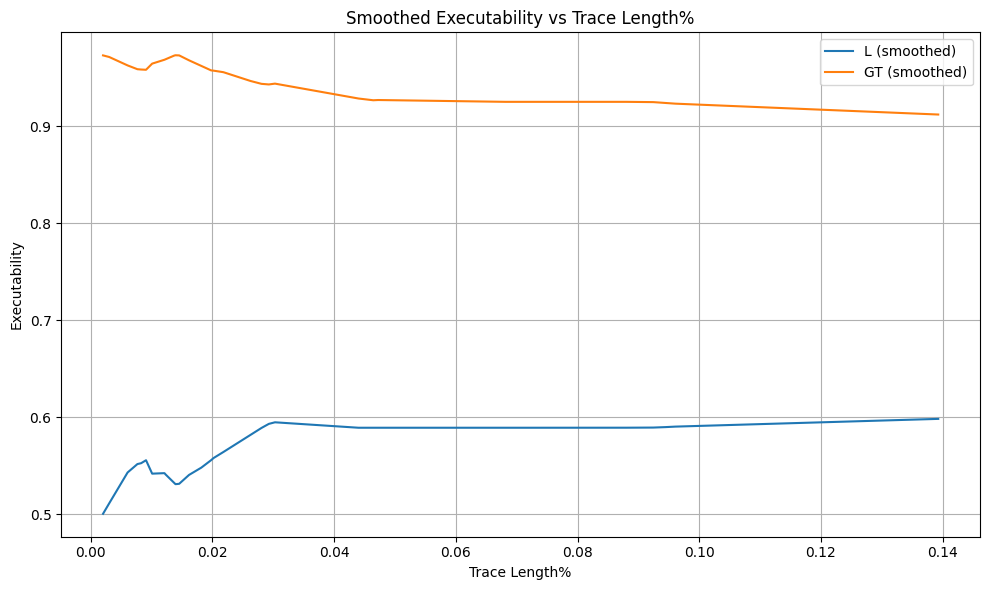

In [16]:
# Read and clean
df = pd.read_csv('cross_exe_results.csv')
df.columns = df.columns.str.strip()
df = df.sort_values(by='objs')

# Apply LOWESS
l_smoothed = lowess(df['l_exe'], df['objs'], frac=0.3)
gt_smoothed = lowess(df['gt_exe'], df['objs'], frac=0.3)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(l_smoothed[:, 0], l_smoothed[:, 1], label='L (smoothed)')
plt.plot(gt_smoothed[:, 0], gt_smoothed[:, 1], label='GT (smoothed)')
plt.xlabel("Trace Length%")
plt.ylabel("Executability")
plt.title("Smoothed Executability vs Trace Length%")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

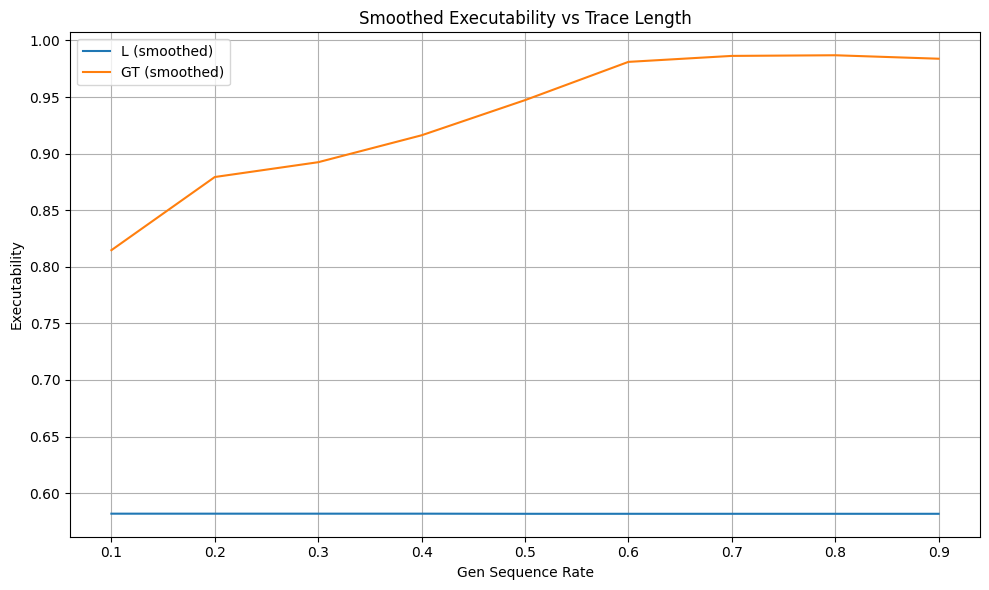

In [17]:
# Read and clean
df = pd.read_csv('cross_exe_results.csv')
df.columns = df.columns.str.strip()
df = df.sort_values(by='gen_seq_rate')

# Apply LOWESS
l_smoothed = lowess(df['l_exe'], df['gen_seq_rate'], frac=0.3)
gt_smoothed = lowess(df['gt_exe'], df['gen_seq_rate'], frac=0.3)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(l_smoothed[:, 0], l_smoothed[:, 1], label='L (smoothed)')
plt.plot(gt_smoothed[:, 0], gt_smoothed[:, 1], label='GT (smoothed)')
plt.xlabel("Gen Sequence Rate")
plt.ylabel("Executability")
plt.title("Smoothed Executability vs Trace Length")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()